In [ ]:
import os
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!cp "/content/gdrive/My Drive/FFHQ200.zip" /content && unzip FFHQ200.zip

Archive:  FFHQ200.zip
replace FFHQ200/00020.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

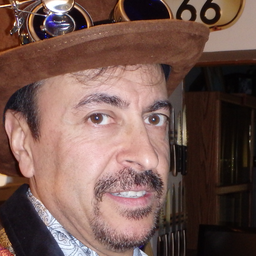

Размерность фото (256, 256, 3)


In [ ]:
# Checking out random photo
img = cv2.imread('/content/FFHQ200/00506.png')
cv2_imshow(img)
print('Размерность фото', img.shape)

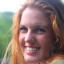

Размерность фото (64, 64, 3)


In [ ]:
# Copying reference photo
!cp "/content/gdrive/My Drive/ref64.png" /content
img_ref = cv2.imread('/content/ref64.png')
cv2_imshow(img_ref)
print('Размерность фото', img_ref.shape)

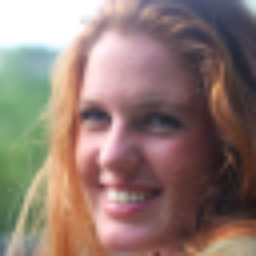

In [ ]:
# Resizing reference photo
img_ref = cv2.resize(img_ref, (256,256))
cv2_imshow(img_ref)

In [ ]:
# Finding L2 range
fl_ref = img_ref.flatten()
def l2(img):
  fl_img = img.flatten()
  return np.sqrt(np.sum((fl_img-fl_ref)**2))

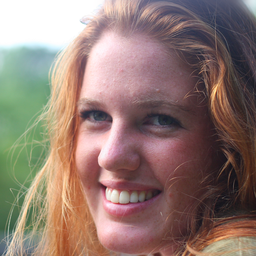

In [ ]:
# Searching reference photo in dataset by measuring l2 range
files = os.listdir("FFHQ200")
res = {}
for item in files:
  img = cv2.imread("FFHQ200/" + item)
  res[l2(img)] = img
list_keys = list(res.keys())
cv2_imshow(res[min(list_keys)])